# Control Package_Learn
First, install the packages  
```
conda install numpy scipy matplotlib    # if not yet installed
conda install -c conda-forge control
```



In [10]:
from control.matlab import *
# from control import *
import matplotlib.pyplot as plt
import scipy as sp

## 1 LTI System
Linear time invariant(LTI) systems are represented in python-control in state space, transfer function, or frequency response data(FRD) form.  
### State Space System
We can use the class: `StateSpace` to represent state-space realizatios of linear time-invariant(LTI) systems:  
\begin{align}
\frac{dx}{dy} &= Ax+Bu\\
y &= Cx+Du
\end{align}
Where $u$ is the input, $x$ is the state and $y$ is the output.  

In [7]:
A = [[1, 2],[1, 2]]
B = [[1],[0]]
C = [[1, 0], [0, 1]]
D = [[0], [0]]
sys = ss(A, B, C, D) # A,B,C,D are matrics

`ss(A, B, C, D, dt)` to create a discrete-time state space system for the matrices of its state and output equations:  
\begin{align}
x[k+1] &=A\cdot x[k]+B\cdot u[k] \\
y[k]   &=c\cdot x[k]+D\cdot u[k]
\end{align}

https://python-control.readthedocs.io/en/0.8.1/control.html#function-ref

### Transfer functions
Use the class: `TransferFunction` to represent input/output transfer functions  
\begin{equation}
G(s) = \frac{\text{num}(s)}{\text{den}(s)}=\frac{a_0 s^m+a_1 s^{m-1}+\cdots+a_m}{b_0 s^n+b_1 s^{n-1}+\cdots+b_n}
\end{equation}
Where $n$ is generally greater than or euqal to m (for a proper tranfer funtion).

In [4]:
num = [1, 2, 8]
den = [1, 2, 3, 4, 5]
sys = TransferFunction(num, den)
Csys = feedback(sys, -1)

In [ ]:
sys = tf2ss(sys)

In [1]:
sys

NameError: name 'sys' is not defined

In [12]:
Csys # feedback(sys1,[sys2, sign])


        s^2 + 2 s + 8
-----------------------------
s^4 + 2 s^3 + 2 s^2 + 2 s - 3

### FRD systems
frequency resonse data (FRD) use the class `FRD`.  
The main data members are omega and fresp, where omega is a 1D array with the frequency points of the response, and fresp is a 3D array, with the first dimension corresponding to the output index of the FRD, the second dimension corresponding to the input index, and the 3rd dimension corresponding to the frequency points in omega.

### Discrete time system
* dt = None: no timebase specified (default)  
* dt = 0: continuous time system
* dt > 0: discrete time system with sampling period 'dt'  
* dt = True: discrete time eith unspecified sampling period

### Conversion between representations
LTI systems can be converted between representations by functions: `ss2tf()`, `tf2ss()`

## 2 Time series data
Types:  
* **Argumets** can be **arrays, matrices**, or **nested lists**.  
* **Return values** are **arrays** (not matrices).  

The time vetor is 1D or 2D with shape (1, n)

In [1]:
# T = [[t1, t2, t3, ..., tn]]

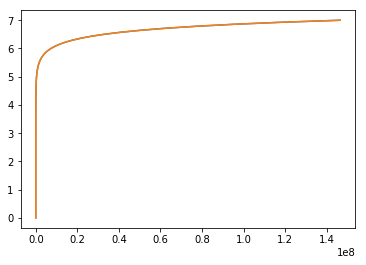

In [9]:
t, y = step(sys)
plt.plot(t, y)

In [12]:
sys1 = ss("1. -2; 3. -4", "5.; 7", "6, 8", "9.")
sys2 = ss("-1.", "1.", "1.", "0.")
sys = append(sys1, sys2)
Q = sp.mat([ [ 1, 2], [2, -1] ]) # basically feedback, output 2 in 1
sysc = connect(sys, Q, [2], [1, 2])

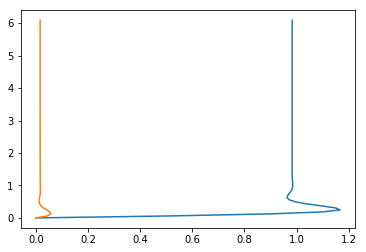

In [14]:
t, y = step(sysc)
plt.plot(t, y)